# Sum of Poisson variables

### Exercise

Simulate 10 discrete variables $X_{i}$ that follow a Poisson distribution with parameter $\mu = 1.7$ and calculate $Y = \sum_{i=1}^n X_i$. Repeat this procedure 1000 times to build a frequency histogram of $Y$. Compare the histogram with a Gaussian distribution with suitable parameters. Plot the histogram and the Gaussian distribution. Note: Calculate the parameters of the Gaussian from the mean and variance of the $X_i$.

### Solution

Let $X_{\rm i}$ be a random variable with a Poisson distribution with parameter $\mu = 1.7$:

$$X_{\rm i} \sim \mathrm{Poisson}(\mu = 1.7)$$

where $i = 1, 2,..., 10$. Let $Y$ be a random variable given by:

$$Y = \sum_{i=1}^{n=10} X_i$$

In this notebook we are going to simulate $1000$ events for $Y$.

In [1]:
%matplotlib inline

In [2]:
# Getting libraries

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson 

In [3]:
# Mean of X
mu = 1.7

# Standard deviation of X
sigma = math.sqrt(mu)

Monte Carlo simulation

In [4]:
variables = 10

In [5]:
simulations = 10000

Random number generator

In [6]:
num_seed = 42
rng = np.random.default_rng(num_seed)

Array to save data

In [7]:
X = rng.poisson(lam=mu, size=(simulations, variables))
Y = np.array([X[i].sum() for i in range(simulations)])

Frequency histogram for Y

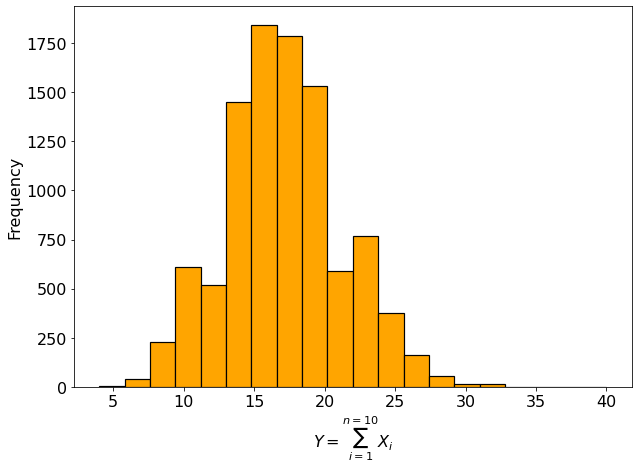

In [8]:
plt.figure(figsize=(10,7))
plt.hist(Y, bins=20, color='orange', edgecolor='black', linewidth=1.2)
plt.ylim(bottom=0)
plt.xlabel('$Y = \sum_{i=1}^{n=10} X_{i}$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Simulation Performance Analysis

In [9]:
mu_Y = variables*mu
print(f"Experimental mean: {Y.mean():0.2f}")
print(f"Theoretical mean: {poisson(mu=mu_Y).mean():0.2f}")

Experimental mean: 16.99
Theoretical mean: 17.00


In [10]:
sigma_Y = math.sqrt(mu_Y)
print(f"Experimental standard deviation: {Y.std():0.2f}")
print(f"Theoretical standard deviation: {poisson(mu=mu_Y).std():0.2f}")

Experimental standard deviation: 4.17
Theoretical standard deviation: 4.12


Gaussian distribution

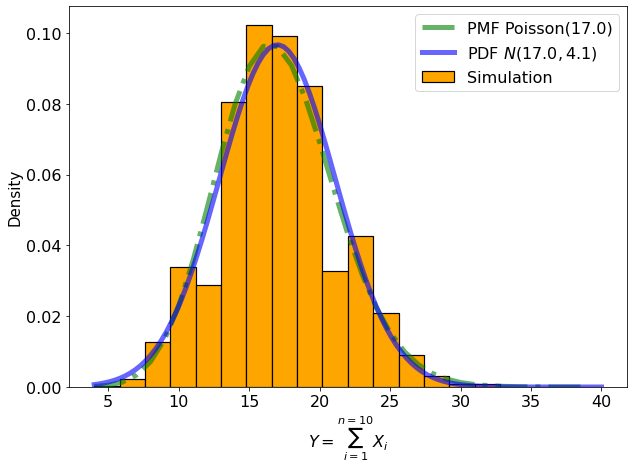

In [11]:
plt.figure(figsize=(10,7))

plt.hist(Y, bins=20, color='orange', edgecolor='black', linewidth=1.2, density=True, label="Simulation")

x = np.arange(start=Y.min(), stop=Y.max(), dtype=int)
plt.plot(x, poisson(mu=mu_Y).pmf(x), ls='dashdot', lw=5, alpha=0.6, color='green', label=f'PMF Poisson({mu_Y:0.1f})')

x = np.linspace(np.min(Y), np.max(Y),100)
plt.plot(x, norm(loc=mu_Y, scale=sigma_Y).pdf(x), ls = '-', color='blue', lw=5, alpha=0.6, label=f'PDF $N({mu_Y:0.1f},{sigma_Y:0.1f})$')

plt.ylim(bottom=0)
plt.xlabel('$Y = \sum_{i=1}^{n=10} X_{i}$', fontsize=16)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

We see above that there is a good agreement with a normal distribution, as indicated by the central limit theorem.